<a href="https://colab.research.google.com/github/PalakAggarwal13/PyTorch-DeepLearning/blob/main/PyTorch_DeepLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
print(torch.__version__)

2.6.0+cu124


In [2]:
t1 = torch.tensor(4.)
t1

tensor(4.)

In [3]:
t1.dtype

torch.float32

In [4]:
t2 = torch.tensor([1.,2,3,4])
t2

tensor([1., 2., 3., 4.])

In [5]:
t2.dtype

torch.float32

In [6]:
t3 = torch.tensor([[1.,2,3],[4,5,6],[7,8,9]])
t3

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [7]:
t3.dtype

torch.float32

In [8]:
t4 = torch.tensor([
    [[11.,12,13],
     [14,15,16]],
    [[17,18,19],
     [20,21,22]]
])
t4

tensor([[[11., 12., 13.],
         [14., 15., 16.]],

        [[17., 18., 19.],
         [20., 21., 22.]]])

In [9]:
t4.dtype

torch.float32

In [10]:
t1.shape

torch.Size([])

In [11]:
t2.shape

torch.Size([4])

In [12]:
t3.shape

torch.Size([3, 3])

In [13]:
t4.shape

torch.Size([2, 2, 3])

In [14]:
x = torch.tensor(3.)
w = torch.tensor(4. , requires_grad = True)
b = torch.tensor(5. , requires_grad = True)

In [15]:
y = w * x + b
y

tensor(17., grad_fn=<AddBackward0>)

In [16]:
y.backward()

In [17]:
print("dy/dx:" , x.grad)
print("dy/dw:" , w.grad)
print("dy/db:" , b.grad)

dy/dx: None
dy/dw: tensor(3.)
dy/db: tensor(1.)


In [18]:
import numpy as np

x = np.array([[1.,2,3],[4,5,6]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

In [19]:
y = torch.from_numpy(x)            #or you can do torch.tensor(x)
y

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float64)

In [20]:
x.dtype , y.dtype

(dtype('float64'), torch.float64)

In [21]:
z = y.numpy()
z

array([[1., 2., 3.],
       [4., 5., 6.]])

In [22]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

In [23]:
# Targets (apples, oranges)
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

In [24]:
inputs = torch.tensor(inputs)
targets = torch.tensor(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [25]:
w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)
print(w)
print(b)

tensor([[ 0.7472, -0.9321, -1.0885],
        [ 0.2008, -1.2308,  0.0905]], requires_grad=True)
tensor([-1.4221,  0.8851], requires_grad=True)


In [26]:
def model(x):
  return x @ w.t() + b

In [27]:
preds = model(inputs)
preds

tensor([[ -56.1259,  -63.0270],
        [ -85.1067,  -83.3587],
        [-124.4404, -141.3206],
        [  -5.5552,  -28.2074],
        [-115.5334,  -97.0802]], grad_fn=<AddBackward0>)

In [28]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [29]:
def mse(t1,t2):
  diff = t1-t2
  return torch.sum(diff * diff) / diff.numel()

In [30]:
loss = mse(preds , targets)
print(loss)  # full tensor

tensor(32582.1777, grad_fn=<DivBackward0>)


In [31]:
loss.backward()

In [32]:
print("dl/dw : " , w.grad)
print("dl/db : " , b.grad)

dl/dw :  tensor([[-12473.9297, -15382.9834,  -9177.7334],
        [-14382.8408, -17088.5918, -10193.6006]])
dl/db :  tensor([-153.5523, -174.5988])


In [33]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


# **GRADIENT DESCENT**

In [34]:
import torch

inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')

targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

inputs = torch.tensor(inputs)
targets = torch.tensor(targets)

w = torch.randn(2,3,requires_grad=True)
b = torch.randn(2,requires_grad=True)

lr = 1e-5

def mse(preds,targets):
  return torch.mean((preds-targets)**2)

for epoch in range(100):

  preds = inputs @ w.t() + b
  loss  = mse(preds,targets)

  loss.backward()

  with torch.no_grad():
    w -= lr * w.grad
    b -= lr * b.grad

    w.grad.zero_()
    b.grad.zero_()

  if epoch % 10 == 0:
        print(f"Epoch {epoch}: Loss = {loss.item():.4f} ,  w =\n{w} , b = {b}")

Epoch 0: Loss = 12697.1826 ,  w =
tensor([[ 1.6516, -1.0901, -0.0846],
        [-1.0386,  0.0217,  1.3246]], requires_grad=True) , b = tensor([0.3085, 0.1737], requires_grad=True)
Epoch 10: Loss = 2566.4712 ,  w =
tensor([[ 1.6963, -0.7841,  0.0513],
        [-0.6050,  0.4811,  1.6012]], requires_grad=True) , b = tensor([0.3097, 0.1788], requires_grad=True)
Epoch 20: Loss = 2097.7954 ,  w =
tensor([[ 1.5952, -0.6504,  0.0844],
        [-0.5404,  0.5447,  1.6335]], requires_grad=True) , b = tensor([0.3091, 0.1795], requires_grad=True)
Epoch 30: Loss = 1848.2356 ,  w =
tensor([[ 1.4805, -0.5464,  0.1024],
        [-0.5272,  0.5534,  1.6319]], requires_grad=True) , b = tensor([0.3083, 0.1796], requires_grad=True)
Epoch 40: Loss = 1631.5378 ,  w =
tensor([[ 1.3700, -0.4518,  0.1177],
        [-0.5214,  0.5546,  1.6257]], requires_grad=True) , b = tensor([0.3075, 0.1796], requires_grad=True)
Epoch 50: Loss = 1440.6897 ,  w =
tensor([[ 1.2659, -0.3636,  0.1320],
        [-0.5168,  0.5548,  1

# **Linear regression using PyTorch built-ins**

In [35]:
import torch.nn as nn

In [36]:
# Input (temp, rainfall, humidity)
inputs = np.array([[73, 67, 43], [91, 88, 64], [87, 134, 58],
                   [102, 43, 37], [69, 96, 70], [73, 67, 43],
                   [91, 88, 64], [87, 134, 58], [102, 43, 37],
                   [69, 96, 70], [73, 67, 43], [91, 88, 64],
                   [87, 134, 58], [102, 43, 37], [69, 96, 70]],
                  dtype='float32')

# Targets (apples, oranges)
targets = np.array([[56, 70], [81, 101], [119, 133],
                    [22, 37], [103, 119], [56, 70],
                    [81, 101], [119, 133], [22, 37],
                    [103, 119], [56, 70], [81, 101],
                    [119, 133], [22, 37], [103, 119]],
                   dtype='float32')

inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)

In [37]:
from torch.utils.data import TensorDataset

In [38]:
train_ds = TensorDataset(inputs,targets)
train_ds[0:3]

(tensor([[ 73.,  67.,  43.],
         [ 91.,  88.,  64.],
         [ 87., 134.,  58.]]),
 tensor([[ 56.,  70.],
         [ 81., 101.],
         [119., 133.]]))

In [39]:
from torch.utils.data import DataLoader

In [40]:
batch_size=5
train_dl = DataLoader(train_ds,batch_size,shuffle=True)

In [41]:
i=0
for xb,yb in train_dl:
  print(f"batch:{i} ")
  print(xb)
  print(yb)
  i +=1

batch:0 
tensor([[ 91.,  88.,  64.],
        [ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [ 73.,  67.,  43.]])
tensor([[ 81., 101.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 56.,  70.]])
batch:1 
tensor([[ 69.,  96.,  70.],
        [ 87., 134.,  58.],
        [ 91.,  88.,  64.],
        [ 69.,  96.,  70.],
        [ 69.,  96.,  70.]])
tensor([[103., 119.],
        [119., 133.],
        [ 81., 101.],
        [103., 119.],
        [103., 119.]])
batch:2 
tensor([[102.,  43.,  37.],
        [ 73.,  67.,  43.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [102.,  43.,  37.]])
tensor([[ 22.,  37.],
        [ 56.,  70.],
        [119., 133.],
        [ 22.,  37.],
        [ 22.,  37.]])


In [42]:
model = nn.Linear(3,2)
print(model.weight)
print(model.bias)

Parameter containing:
tensor([[ 0.1284,  0.5173,  0.2050],
        [-0.4538, -0.1383, -0.2387]], requires_grad=True)
Parameter containing:
tensor([ 0.4378, -0.4502], requires_grad=True)


In [43]:
list(model.parameters())

[Parameter containing:
 tensor([[ 0.1284,  0.5173,  0.2050],
         [-0.4538, -0.1383, -0.2387]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4378, -0.4502], requires_grad=True)]

In [44]:
import torch.nn.functional as F

In [45]:
loss_fn = F.mse_loss

In [46]:
loss = loss_fn(model(inputs),targets)
print(loss)

tensor(13079.1104, grad_fn=<MseLossBackward0>)


In [47]:
opt = torch.optim.SGD(model.parameters(),lr=1e-5)

In [48]:
def fit(num_epochs,model,loss_fn,opt):
  for epoch in range(num_epochs):
    for xb,yb in train_dl:
      preds = model(xb)
      loss = loss_fn(preds,yb)
      loss.backward()
      opt.step()
      opt.zero_grad()

    if (epoch+1) % 10 == 0:
          print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))

In [49]:
fit(100, model, loss_fn, opt)

Epoch [10/100], Loss: 434.4644
Epoch [20/100], Loss: 109.5578
Epoch [30/100], Loss: 102.7449
Epoch [40/100], Loss: 75.4034
Epoch [50/100], Loss: 90.0209
Epoch [60/100], Loss: 6.0843
Epoch [70/100], Loss: 56.4274
Epoch [80/100], Loss: 41.4370
Epoch [90/100], Loss: 26.6095
Epoch [100/100], Loss: 17.8350


In [50]:
# Generate predictions
preds = model(inputs)
preds

tensor([[ 58.2631,  71.2939],
        [ 80.5307,  97.7325],
        [120.8210, 137.9684],
        [ 26.7327,  42.8765],
        [ 95.7868, 110.5257],
        [ 58.2631,  71.2939],
        [ 80.5307,  97.7325],
        [120.8210, 137.9684],
        [ 26.7327,  42.8765],
        [ 95.7868, 110.5257],
        [ 58.2631,  71.2939],
        [ 80.5307,  97.7325],
        [120.8210, 137.9684],
        [ 26.7327,  42.8765],
        [ 95.7868, 110.5257]], grad_fn=<AddmmBackward0>)

In [51]:
# Compare with targets
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.],
        [ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

# **Working with Images & Logistic Regression in PyTorch**

In [52]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [53]:
dataset = MNIST(root='data/',download=True)

100%|██████████| 9.91M/9.91M [00:00<00:00, 17.9MB/s]
100%|██████████| 28.9k/28.9k [00:00<00:00, 487kB/s]
100%|██████████| 1.65M/1.65M [00:00<00:00, 4.49MB/s]
100%|██████████| 4.54k/4.54k [00:00<00:00, 4.96MB/s]


In [54]:
len(dataset)

60000

In [55]:
test_dataset = MNIST(root='data/',train=False)
len(test_dataset)

10000

In [56]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


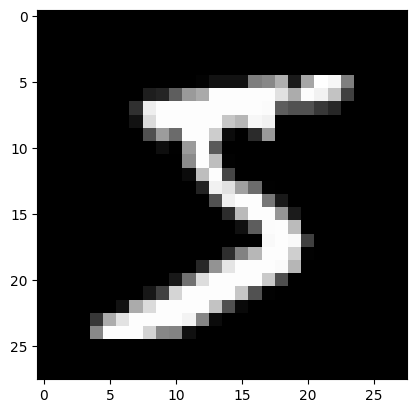

In [58]:
image , label = dataset[0]
plt.imshow(image , cmap='gray')
print("Label:" ,label)

Label: 3


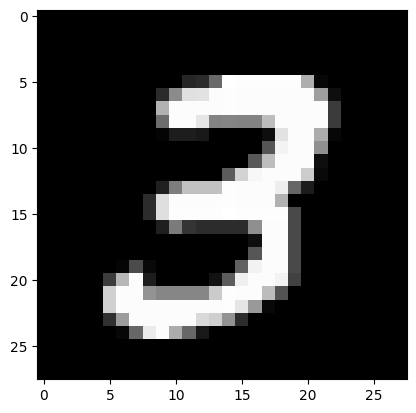

In [59]:
image , label = dataset[7]
plt.imshow(image , cmap='gray')
print("Label:" , label)

In [60]:
import torchvision.transforms as transforms

In [61]:
dataset = MNIST(root='data/',train=True,transform=transforms.ToTensor())

In [62]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [63]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


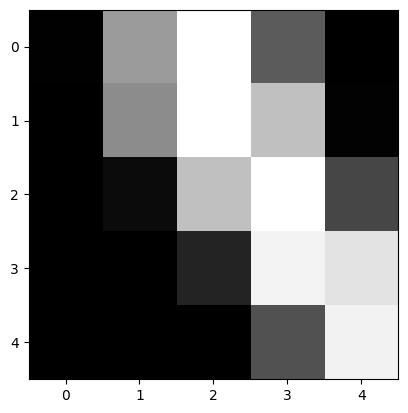

In [64]:
plt.imshow(img_tensor[0,10:15,10:15],cmap='gray');

In [65]:
from torch.utils.data import random_split

train_ds , val_ds = random_split(dataset,[50000,10000])
len(train_ds) , len(val_ds)

(50000, 10000)

In [66]:
from torch.utils.data import DataLoader

batch_size=128

train_loader = DataLoader(train_ds,batch_size,shuffle=True)
val_loader = DataLoader(val_ds,batch_size)

In [67]:
import numpy as np

def split_indices(n,val_pct):
  n_val = int(val_pct*n)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [68]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)

In [69]:
print(len(train_indices)) , print(len(val_indices))
print("sample val_indices : ", val_indices[:20])

48000
12000
sample val_indices :  [43155 41104 22186 58718 51394  1250 38297  7114 11509 26103 32837 37249
  2241 46231 50043 32581 11450 16065 10495 25998]


In [70]:
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data.dataloader import DataLoader

In [71]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset,
                          batch_size,
                          sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset,
                        batch_size,
                        sampler = val_indices)

In [72]:
print("xb.shape before flattening:", xb.shape)

xb.shape before flattening: torch.Size([5, 3])


In [73]:
import torch.nn as nn

input_size = 28*28
num_classes = 10

model = nn.Linear(input_size,num_classes)

In [74]:
print(model.weight.shape)
print(model.weight)

torch.Size([10, 784])
Parameter containing:
tensor([[ 2.7286e-02,  9.1744e-03, -1.8298e-02,  ..., -2.7495e-02,
          1.3158e-02,  9.5184e-03],
        [-1.7640e-02,  1.9692e-02, -4.3821e-03,  ..., -3.4928e-03,
          2.6890e-02, -1.4045e-03],
        [-6.3840e-03, -3.5366e-02, -2.2740e-02,  ..., -7.2350e-03,
         -2.8625e-02,  3.0822e-02],
        ...,
        [-2.5419e-02, -5.3954e-03,  6.6877e-03,  ..., -2.0960e-02,
         -2.4285e-02, -3.4420e-03],
        [ 2.2125e-02, -1.8158e-02,  1.7363e-02,  ...,  8.0122e-03,
          2.2387e-02,  2.0595e-02],
        [ 1.6023e-02,  3.0994e-06, -1.3183e-03,  ...,  7.5863e-03,
          2.7718e-02, -1.3009e-02]], requires_grad=True)


In [75]:
print(model.bias.shape)
print(model.bias)

torch.Size([10])
Parameter containing:
tensor([-0.0306, -0.0268,  0.0141, -0.0331,  0.0271, -0.0198, -0.0011, -0.0309,
         0.0142, -0.0345], requires_grad=True)


In [76]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(28*28, 10)

    def forward(self, xb):
        xb = xb.view(xb.size(0), -1)
        return self.linear(xb)

model = MnistModel()

In [77]:
print(model.linear.weight.shape)
print(model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784])
torch.Size([10])


[Parameter containing:
 tensor([[-0.0148, -0.0014, -0.0101,  ...,  0.0207, -0.0129, -0.0340],
         [-0.0082, -0.0308, -0.0214,  ...,  0.0185,  0.0213, -0.0216],
         [ 0.0082, -0.0303,  0.0009,  ..., -0.0328,  0.0164, -0.0061],
         ...,
         [ 0.0183,  0.0204,  0.0182,  ...,  0.0306,  0.0114,  0.0201],
         [ 0.0247, -0.0124, -0.0167,  ...,  0.0091,  0.0001, -0.0244],
         [-0.0063,  0.0205,  0.0108,  ...,  0.0299, -0.0193,  0.0225]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0306, -0.0283,  0.0239, -0.0208,  0.0114, -0.0078,  0.0050, -0.0306,
         -0.0073, -0.0026], requires_grad=True)]

In [78]:
for images, labels in train_loader:
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

outputs.shape :  torch.Size([100, 10])
Sample outputs :
 tensor([[-0.0580,  0.2365, -0.0957,  0.1853, -0.3772,  0.2909,  0.0248,  0.1228,
          0.0721, -0.2793],
        [-0.1960, -0.0712, -0.1152,  0.1100,  0.0556,  0.1623, -0.1254,  0.0405,
          0.2053, -0.5895]])


In [79]:
probs = F.softmax(outputs,dim=1)
print(probs[:2].data)
print("Sum : " , torch.sum(probs[0]).item())

tensor([[0.0913, 0.1226, 0.0879, 0.1165, 0.0664, 0.1294, 0.0992, 0.1094, 0.1040,
         0.0732],
        [0.0847, 0.0960, 0.0919, 0.1151, 0.1090, 0.1213, 0.0909, 0.1073, 0.1266,
         0.0572]])
Sum :  0.9999998807907104


In [80]:
max_probs , preds = torch.max(probs , dim=1)
print(preds)
print(max_probs)

tensor([5, 8, 5, 8, 9, 7, 7, 7, 9, 8, 8, 3, 9, 3, 5, 1, 1, 1, 3, 2, 1, 8, 8, 8,
        8, 3, 0, 3, 8, 1, 8, 4, 8, 9, 8, 8, 0, 5, 8, 0, 3, 8, 8, 8, 8, 8, 5, 7,
        0, 8, 8, 9, 5, 7, 8, 4, 8, 5, 5, 8, 8, 8, 8, 7, 8, 3, 8, 8, 4, 5, 8, 8,
        8, 8, 8, 1, 3, 6, 9, 4, 5, 8, 8, 7, 8, 8, 3, 8, 8, 3, 9, 1, 9, 3, 3, 8,
        0, 3, 8, 8])
tensor([0.1294, 0.1266, 0.1300, 0.1407, 0.1240, 0.1585, 0.1294, 0.1389, 0.1295,
        0.1381, 0.1244, 0.1328, 0.1148, 0.1510, 0.1159, 0.1273, 0.1271, 0.1184,
        0.1214, 0.1120, 0.1139, 0.1419, 0.1362, 0.1256, 0.1138, 0.1460, 0.1095,
        0.1246, 0.1211, 0.1201, 0.1532, 0.1318, 0.1334, 0.1195, 0.1128, 0.1158,
        0.1175, 0.1457, 0.1125, 0.1255, 0.1266, 0.1229, 0.1281, 0.1131, 0.1285,
        0.1243, 0.1211, 0.1192, 0.1311, 0.1321, 0.1238, 0.1249, 0.1237, 0.1310,
        0.1358, 0.1196, 0.1228, 0.1171, 0.1191, 0.1373, 0.1269, 0.1139, 0.1470,
        0.1316, 0.1332, 0.1364, 0.1242, 0.1405, 0.1206, 0.1294, 0.1140, 0.1286,
        0.1548, 0.1

In [81]:
labels

tensor([5, 0, 3, 4, 7, 0, 4, 2, 9, 4, 5, 3, 3, 0, 7, 1, 0, 1, 3, 1, 1, 8, 6, 7,
        1, 5, 2, 6, 8, 6, 8, 9, 9, 7, 8, 1, 2, 0, 3, 2, 0, 1, 6, 5, 6, 1, 4, 7,
        8, 2, 8, 9, 0, 0, 1, 5, 2, 2, 3, 9, 9, 1, 4, 0, 2, 0, 1, 7, 1, 2, 3, 1,
        7, 4, 9, 1, 0, 7, 9, 4, 3, 6, 9, 0, 2, 8, 5, 4, 4, 0, 4, 2, 7, 3, 0, 8,
        8, 0, 7, 9])

In [82]:
def accuracy(outputs , labels):
  max_probs , preds = torch.max(probs,dim=1)
  return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [83]:
accuracy(preds,labels)

tensor(0.2000)

In [84]:
loss_fn = F.cross_entropy

loss = loss_fn(outputs,preds)
print(loss)

tensor(2.0563, grad_fn=<NllLossBackward0>)


In [85]:
lr = 0.001
optimizer = torch.optim.SGD(model.parameters(),lr)

In [86]:
def loss_batch(model , loss_fn , xb , yb , opt=None , metric = None):
  preds = model(xb)
  loss = loss_fn(preds,yb)

  if opt is not None:
    loss.backward()
    opt.step()
    opt.zero_grad()

  metric_results = None
  if metric is not None:
    metric_results = metric(preds,yb)

  return loss.item(),len(xb),metric_results

In [87]:
def evaluate(model , loss_fn , valid_dl , metric = None):
  with torch.no_grad():
    results = [loss_batch(model , loss_fn , xb , yb , metric = metric)for xb, yb in valid_dl]
    losses , nums , metrics = zip(*results)
    total = np.sum(nums)
    avg_loss = np.sum(np.multiply(nums,losses)) / total
    avg_metric = None
    if metric is not None:
      avg_metric = np.sum(np.multiply(nums,metrics)) / total
    return avg_loss , total , avg_metric

In [88]:
def accuracy(outputs , labels):
  _,preds = torch.max(outputs, dim=1)
  return torch.tensor(torch.sum(preds==labels).item() / len(preds))

In [89]:
val_loss , total , val_accuracy = evaluate(model , loss_fn , val_loader , metric = accuracy)
print('Loss:{:.4f},Accuracy:{:.4f}'.format(val_loss,val_accuracy))

Loss:2.2749,Accuracy:0.1699


In [90]:
def fit(epochs , model , loss_fn , opt , train_dl , val_dl , metric=None):
  for epoch in range(epochs):
    for xb , yb in train_dl:
      loss = loss_batch(model,loss_fn,xb,yb,opt)
      result = evaluate(model , loss_fn , val_dl , metric)
      val_loss , total , val_metrics = result

      if metric is None:
        print('Epoch [{}/{}] , loss = {:.4f}'.format(epoch+1 , epochs , val_loss))
      else:
        print('Epoch [{}/{}] , loss = {:.4f} , {} : {:.4f}'.format(epoch+1 , epochs , val_loss , metric.__name__,val_metrics))

In [91]:
model = MnistModel()
optimizer = torch.optim.SGD(model.parameters() , lr=0.001)

In [92]:
# fit(5 , model , F.cross_entropy ,optimizer,train_loader,val_loader,accuracy)

In [93]:
test_dataset= MNIST(root='data/',train=False,transform = transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


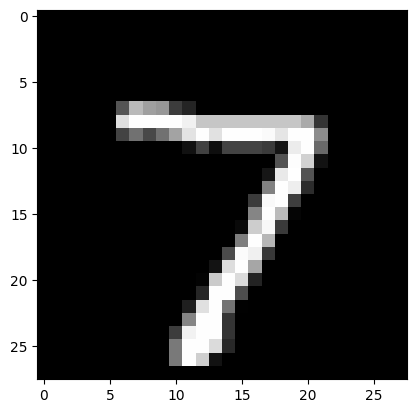

In [94]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [95]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds  = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 9


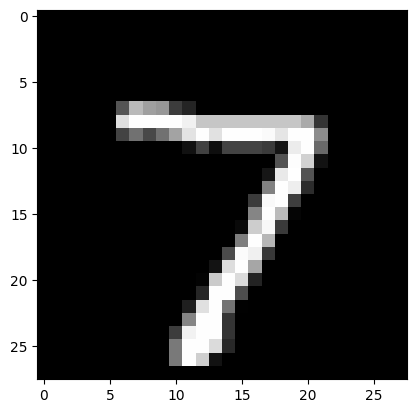

In [96]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 0 , Predicted: 2


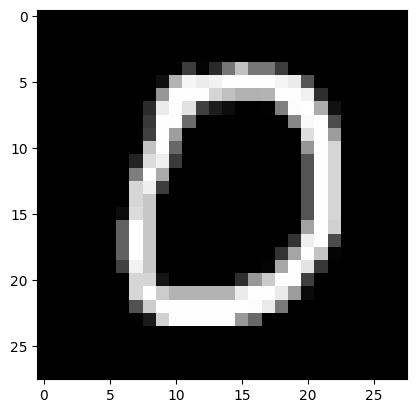

In [97]:
img, label = test_dataset[10]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 2 , Predicted: 0


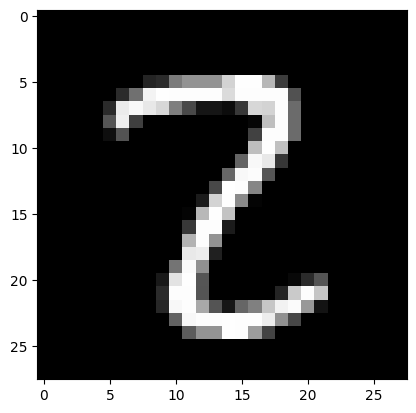

In [98]:
img, label = test_dataset[1839]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [99]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model,F.cross_entropy, test_loader,metric=accuracy)
result

(np.float64(2.3178787593841554), np.int64(10000), np.float64(0.079))

In [100]:
torch.save(model.state_dict(), 'mnist-logistic.pth')
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0021,  0.0147, -0.0344,  ..., -0.0232, -0.0189,  0.0273],
                      [-0.0056,  0.0357,  0.0118,  ...,  0.0076, -0.0320,  0.0163],
                      [-0.0091,  0.0079, -0.0233,  ...,  0.0032,  0.0296, -0.0235],
                      ...,
                      [ 0.0025,  0.0123, -0.0292,  ..., -0.0031,  0.0097, -0.0028],
                      [ 0.0176,  0.0280, -0.0001,  ...,  0.0164,  0.0275, -0.0241],
                      [ 0.0197, -0.0140, -0.0333,  ..., -0.0356, -0.0333,  0.0002]])),
             ('linear.bias',
              tensor([-0.0055,  0.0096, -0.0258, -0.0101, -0.0143,  0.0316,  0.0207, -0.0224,
                       0.0229, -0.0322]))])

In [101]:
model2 = MnistModel()
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0021,  0.0147, -0.0344,  ..., -0.0232, -0.0189,  0.0273],
                      [-0.0056,  0.0357,  0.0118,  ...,  0.0076, -0.0320,  0.0163],
                      [-0.0091,  0.0079, -0.0233,  ...,  0.0032,  0.0296, -0.0235],
                      ...,
                      [ 0.0025,  0.0123, -0.0292,  ..., -0.0031,  0.0097, -0.0028],
                      [ 0.0176,  0.0280, -0.0001,  ...,  0.0164,  0.0275, -0.0241],
                      [ 0.0197, -0.0140, -0.0333,  ..., -0.0356, -0.0333,  0.0002]])),
             ('linear.bias',
              tensor([-0.0055,  0.0096, -0.0258, -0.0101, -0.0143,  0.0316,  0.0207, -0.0224,
                       0.0229, -0.0322]))])

In [102]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, F.cross_entropy,test_loader, metric=accuracy)
result

(np.float64(2.3178787593841554), np.int64(10000), np.float64(0.079))

# **TRAINING DEEP NEURAL NETWORK USING GPU**

In [172]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data.sampler import SubsetRandomSampler
from torch.utils.data import DataLoader

In [173]:
dataset = MNIST(root='data/' , download=True,transform = transforms.ToTensor())

In [174]:
len(dataset)

60000

torch.Size([1, 28, 28])
5


(None, None)

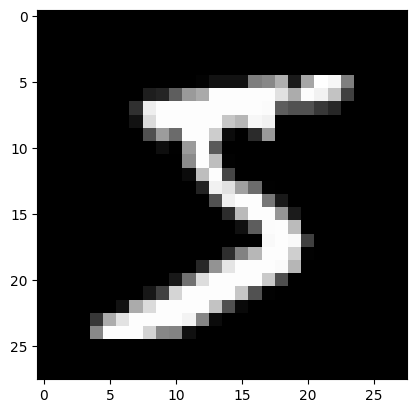

In [175]:
img , label = dataset[0]
plt.imshow(img[0] , cmap='gray')
print(img.shape) , print(label)

In [176]:
def split_indices(n,val_pct):
  n_val = int(n*val_pct)
  idxs = np.random.permutation(n)
  return idxs[n_val:] , idxs[:n_val]

In [177]:
train_indices , val_indices = split_indices(len(dataset),val_pct=0.2)
print(len(train_indices)) , print(len(val_indices))

48000
12000


(None, None)

In [178]:
batch_size = 100

train_sampler = SubsetRandomSampler(train_indices)
train_loader = DataLoader(dataset , batch_size=batch_size , sampler = train_sampler)

val_sampler = SubsetRandomSampler(val_indices)
val_loader = DataLoader(dataset , batch_size=batch_size , sampler = val_sampler)

In [181]:
for images, labels in train_loader:
    print(images.shape)  # torch.Size([100, 1, 28, 28])
    images_flat = images.view(images.size(0), -1)
    print(images_flat.shape)  # torch.Size([100, 784])
    break

torch.Size([100, 1, 28, 28])
torch.Size([100, 784])


In [182]:
import torch.nn as nn
import torch.nn.functional as F

In [183]:
class MnistModel(nn.Module):
    def __init__(self,in_size,hidden_size,out_size):
      super().__init__()
      self.linear1 = nn.Linear(in_size,hidden_size)
      self.linear2 = nn.Linear(hidden_size,out_size)

    def forward(self,xb):
      xb = xb.view(xb.size(0),-1)
      out = self.linear1(xb)
      out = F.relu(out)
      out = self.linear2(out)
      return out

In [184]:
input_size = 28*28
num_classes = 10

model = MnistModel(in_size=input_size,hidden_size=32,out_size=10)

In [185]:
for t in model.parameters():
  print(t.shape)

torch.Size([32, 784])
torch.Size([32])
torch.Size([10, 32])
torch.Size([10])


In [171]:
for images , labels in train_loader:
  outputs = model(images)
  loss = F.cross_entropy(outputs,labels)
  print('Loss:',loss.item())
  break

print(outputs.shape)
print(outputs[:2])

Loss: 2.303861141204834
torch.Size([100, 10])
tensor([[ 0.0813,  0.1808,  0.1341, -0.0028,  0.0312, -0.1947,  0.1108,  0.0099,
          0.2166,  0.2002],
        [ 0.0676,  0.2377,  0.0166,  0.0404,  0.0893, -0.0598,  0.0405,  0.2004,
          0.1546,  0.2677]], grad_fn=<SliceBackward0>)
